In [562]:
import pandas as pd


shap_dc_path = "C:/.../SHAPVAL/shap_values_dc.csv"
shap_svm_path = "C:/.../SHAPVAL/shap_values_svm.csv"
shap_nn_path = "C:/.../SHAPVAL/shap_values_nn.csv"

data_dc = pd.read_csv(shap_dc_path)
data_svm = pd.read_csv(shap_svm_path)
data_nn = pd.read_csv(shap_nn_path)

In [563]:
# DATA PREPARATION: removing "Unnamed: 0" column

data_dc = data_dc.drop(data_dc.filter(["Unnamed: 0"]), axis=1)
data_svm = data_svm.drop(data_svm.filter(["Unnamed: 0"]), axis=1)
data_nn = data_nn.drop(data_nn.filter(["Unnamed: 0"]), axis=1)

In [564]:
# adding new "Mean_total" row, sorted by mean (descending)

data_dc.loc["Mean_total"] = data_dc.mean()
data_svm.loc["Mean_total"] = data_svm.mean()
data_nn.loc["Mean_total"] = data_nn.mean()


In [628]:
data_dc

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.000000,0.000000,0.000000,0.000000,-0.006753,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,-0.002569,0.000000,-0.010651,0.005475,0.0,0.000000,0.000000,0.002284,...,-0.004613,0.0,0.0,0.000000,0.000000,0.008212,0.000000,0.000000,-0.010028,0.0
2,0.0,-0.001369,0.006276,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.007531,...,-0.009818,0.0,0.0,0.000000,0.005954,0.000000,0.000000,0.000000,-0.009321,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.001651,0.000000,0.000000,0.0
4,0.0,0.000000,0.004207,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.003296,...,0.000000,0.0,0.0,0.000000,0.000000,-0.004292,0.011093,0.003445,0.004246,0.0
5,0.0,0.000000,0.000000,-0.004012,0.000000,0.000840,0.0,0.000000,0.000000,0.000000,...,-0.001431,0.0,0.0,0.000000,0.000000,0.000000,0.006848,0.006282,0.000000,0.0
6,0.0,0.000000,0.000000,-0.005238,0.000000,-0.002334,0.0,-0.010076,0.000000,0.000000,...,0.000000,0.0,0.0,-0.004012,0.000000,0.000000,0.000203,-0.005875,-0.003329,0.0
7,0.0,0.000000,0.010781,-0.021210,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.015924,0.0,0.0,-0.022296,-0.007481,0.008760,0.004692,0.000000,0.000000,0.0
8,0.0,0.000000,0.000303,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,-0.015231,0.0,0.0,0.000000,-0.012342,0.000000,0.000000,0.000000,0.000000,0.0
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.013851,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [565]:
# creating dictionaries in order to sort the keys (bits) by value

dc_dict = data_dc.to_dict(orient='index')
dc_dictionary = dc_dict["Mean_total"]

svm_dict = data_svm.to_dict(orient='index')
svm_dictionary = svm_dict["Mean_total"]

nn_dict = data_nn.to_dict(orient='index')
nn_dictionary = nn_dict["Mean_total"]

In [566]:
# sorting dictionaries by value (descending), setting cutt-off to 0.0015, creating sets

import operator


dc_dict_dictionary_sorted = dict(sorted(dc_dict_dictionary.items(), key=operator.itemgetter(1),reverse=True))
dc_dict_dictionary_sorted  = {k:v for (k,v) in dc_dict_dictionary_sorted.items() if v > 0.0015}
dc_set = dc_dict_dictionary_sorted.keys
dc_set = set(dc_dict_dictionary_sorted)

svm_dict_dictionary_sorted = dict(sorted(svm_dict_dictionary.items(), key=operator.itemgetter(1),reverse=True))
svm_dict_dictionary_sorted  = {k:v for (k,v) in svm_dict_dictionary_sorted.items() if v > 0.0015}
svm_set = svm_dict_dictionary_sorted.keys
svm_set = set(svm_dict_dictionary_sorted)

nn_dict_dictionary_sorted = dict(sorted(nn_dict_dictionary.items(), key=operator.itemgetter(1),reverse=True))
nn_dict_dictionary_sorted  = {k:v for (k,v) in nn_dict_dictionary_sorted.items() if v > 0.0015}
nn_set = nn_dict_dictionary_sorted.keys
nn_set = set(nn_dict_dictionary_sorted)

<function matplotlib.pyplot.show(close=None, block=None)>

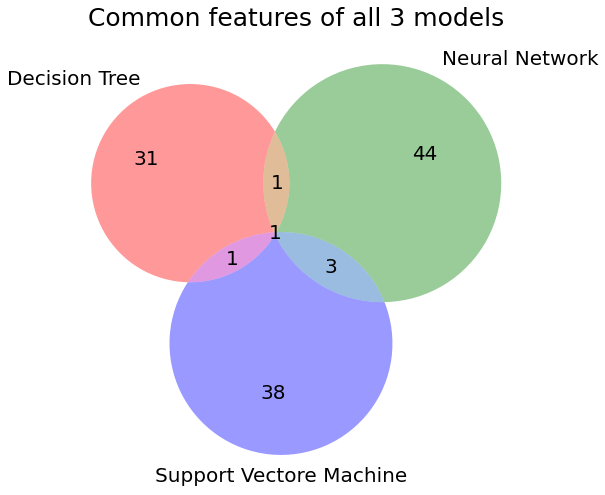

In [625]:
# Venn Diagram

from matplotlib_venn import venn3
from matplotlib import pyplot as plt


plt.figure(figsize=(10,7))
out = venn3([dc_set, nn_set, svm_set], ('Decision Tree', 'Neural Network', 'Support Vectore Machine'))
plt.title("Common features of all 3 models", fontdict = {'fontsize' : 25})
for text in out.set_labels:
    text.set_fontsize(20)
for text in out.subset_labels:
    text.set_fontsize(20)

    
plt.show

In [627]:
# Fragments that are the most common for all 3 models 

intersection_dc_nn = dc_set & nn_set
intersection_dc_svm = dc_set & svm_set
intersection_nn_svm = nn_set & svm_set
intersection_dc_nn_svm = dc_set & nn_set & svm_set
intersection_dc_nn_svm

{'1911'}

In [621]:
final_set = intersection_dc_nn.union(intersection_dc_svm, intersection_nn_svm)
print("The most common bits are :", final_set)

The most common bits are : {'653', '67', '1722', '1838', '1911', '1791'}


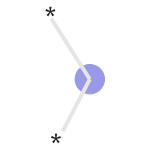

In [626]:
# Drawing of the 926th fragment

from rdkit import Chem
from rdkit.Chem import Draw, AllChem


# drawing of "926" bit
mol = Chem.MolFromSmiles('O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, bitInfo=bi)
bi[926]
((6, 2),)
mfp2_svg = Draw.DrawMorganBit(mol, 926, bi, useSVG=True)
mfp2_svg

# literature?

In [ ]:
# The default highlight colors for the Morgan bits indicate:
    # blue: the central atom in the environment
    # yellow: aromatic atoms
    # gray: aliphatic ring atoms